In [1]:
#Importing required packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import xgboost
%matplotlib inline


In [2]:
df= pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

## Predicting silica concentrate is our main goal

In [4]:
df.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,...,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453
unique,4097,278,293,409317,319416,180189,131143,105805,43675,80442,...,86819,299573,331189,322315,309264,276051,301502,295667,38696,55569
top,2017-06-20 18:00:00,"64,03","6,26","2562,5","534,668","402,246","10,0591","1,75","299,927","255,322",...,"299,487","452,441","608,887","601,06","491,406","513,879","474,37","479,478","65,44","2,08"
freq,180,142560,142560,690,959,1735,1509,3214,13683,1487,...,3405,1013,817,989,733,709,746,905,16920,17100


In [5]:
df.drop("date",axis=1,inplace=True)

In [6]:
def cvtt(x):
    x= x.replace(",",".")
    return float(x)

In [7]:
for i in df.columns:
    df[i]= df[i].apply(cvtt)

In [8]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


In [9]:
df.corr()['% Silica Concentrate']

% Iron Feed                    -0.077052
% Silica Feed                   0.072724
Starch Flow                    -0.066394
Amina Flow                      0.156701
Ore Pulp Flow                   0.008222
Ore Pulp pH                    -0.147739
Ore Pulp Density                0.046984
Flotation Column 01 Air Flow   -0.219158
Flotation Column 02 Air Flow   -0.167398
Flotation Column 03 Air Flow   -0.218891
Flotation Column 04 Air Flow   -0.005011
Flotation Column 05 Air Flow   -0.009293
Flotation Column 06 Air Flow   -0.049650
Flotation Column 07 Air Flow   -0.071776
Flotation Column 01 Level       0.017217
Flotation Column 02 Level       0.030955
Flotation Column 03 Level       0.014246
Flotation Column 04 Level      -0.149456
Flotation Column 05 Level      -0.169170
Flotation Column 06 Level      -0.102443
Flotation Column 07 Level      -0.141387
% Iron Concentrate             -0.800560
% Silica Concentrate            1.000000
Name: % Silica Concentrate, dtype: float64

In [10]:
df2=pd.DataFrame(df)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
df['Flotation Column 01 Air Flow']= df['Flotation Column 02 Air Flow']+df['Flotation Column 01 Air Flow']

In [13]:
for i in df.columns[:-1]:
    scaler=MinMaxScaler()
    df[i]= scaler.fit_transform(np.array(df[i]).reshape(-1,1))

In [14]:
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,0.540799,0.488314,0.479273,0.634233,0.459143,0.639033,0.660348,0.406688,0.388770,0.394444,...,0.349737,0.432193,0.359466,0.392732,0.542995,0.659121,0.535024,0.718177,0.815436,1.31
1,0.540799,0.488314,0.480047,0.647351,0.498537,0.639423,0.660348,0.400735,0.375311,0.395967,...,0.339555,0.424473,0.353963,0.403231,0.551733,0.647538,0.534199,0.666028,0.815436,1.31
2,0.540799,0.488314,0.483071,0.655564,0.552439,0.639812,0.660348,0.393595,0.362077,0.393044,...,0.334583,0.423560,0.417646,0.405428,0.554825,0.624040,0.537706,0.584493,0.815436,1.31
3,0.540799,0.488314,0.483690,0.656791,0.511653,0.640250,0.660348,0.411984,0.395004,0.391639,...,0.351154,0.425244,0.400237,0.416282,0.548113,0.598483,0.519040,0.520727,0.815436,1.31
4,0.540799,0.488314,0.481520,0.635705,0.566263,0.640639,0.660348,0.406390,0.383298,0.390820,...,0.339200,0.425244,0.391719,0.426350,0.562510,0.581157,0.530074,0.516620,0.815436,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,0.304253,0.682144,0.430292,0.400473,0.243466,0.422409,0.401374,0.673977,0.615577,0.653055,...,0.688102,0.340705,0.355810,0.980522,0.495069,0.649867,0.535001,0.498486,0.372483,1.71
737449,0.304253,0.682144,0.427287,0.465518,0.204992,0.422088,0.400984,0.684167,0.630978,0.654779,...,0.273327,0.353811,0.313611,0.970531,0.494397,0.667266,0.399901,0.517978,0.372483,1.71
737450,0.304253,0.682144,0.427318,0.519854,0.170952,0.421168,0.400564,0.700871,0.658453,0.654779,...,0.215034,0.364180,0.305037,0.974724,0.496625,0.661400,0.331837,0.531998,0.372483,1.71
737451,0.304253,0.682144,0.184774,0.501897,0.205864,0.420253,0.400144,0.683129,0.631376,0.647104,...,0.658042,0.358862,0.414257,0.986548,0.473018,0.659212,0.340693,0.533723,0.372483,1.71


In [15]:
df.corr()['% Silica Concentrate']

% Iron Feed                    -0.077052
% Silica Feed                   0.072724
Starch Flow                    -0.066394
Amina Flow                      0.156701
Ore Pulp Flow                   0.008222
Ore Pulp pH                    -0.147739
Ore Pulp Density                0.046984
Flotation Column 01 Air Flow   -0.200816
Flotation Column 02 Air Flow   -0.167398
Flotation Column 03 Air Flow   -0.218891
Flotation Column 04 Air Flow   -0.005011
Flotation Column 05 Air Flow   -0.009293
Flotation Column 06 Air Flow   -0.049650
Flotation Column 07 Air Flow   -0.071776
Flotation Column 01 Level       0.017217
Flotation Column 02 Level       0.030955
Flotation Column 03 Level       0.014246
Flotation Column 04 Level      -0.149456
Flotation Column 05 Level      -0.169170
Flotation Column 06 Level      -0.102443
Flotation Column 07 Level      -0.141387
% Iron Concentrate             -0.800560
% Silica Concentrate            1.000000
Name: % Silica Concentrate, dtype: float64

In [16]:
df.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [17]:
df.drop(['Starch Flow','Ore Pulp Flow','Ore Pulp Density','Flotation Column 02 Air Flow',
         'Flotation Column 04 Air Flow','Flotation Column 03 Air Flow',
        'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow','Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level'],axis=1, inplace= True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Amina Flow                    737453 non-null  float64
 3   Ore Pulp pH                   737453 non-null  float64
 4   Flotation Column 01 Air Flow  737453 non-null  float64
 5   Flotation Column 04 Level     737453 non-null  float64
 6   Flotation Column 05 Level     737453 non-null  float64
 7   Flotation Column 06 Level     737453 non-null  float64
 8   Flotation Column 07 Level     737453 non-null  float64
 9   % Iron Concentrate            737453 non-null  float64
 10  % Silica Concentrate          737453 non-null  float64
dtypes: float64(11)
memory usage: 61.9 MB


In [19]:
df.corr()['% Silica Concentrate']

% Iron Feed                    -0.077052
% Silica Feed                   0.072724
Amina Flow                      0.156701
Ore Pulp pH                    -0.147739
Flotation Column 01 Air Flow   -0.200816
Flotation Column 04 Level      -0.149456
Flotation Column 05 Level      -0.169170
Flotation Column 06 Level      -0.102443
Flotation Column 07 Level      -0.141387
% Iron Concentrate             -0.800560
% Silica Concentrate            1.000000
Name: % Silica Concentrate, dtype: float64

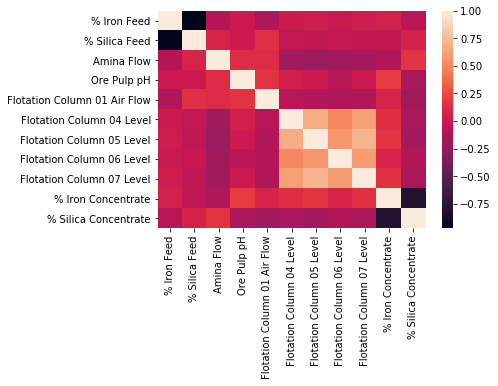

In [20]:
sns.heatmap(df.corr())

In [21]:
df.corr()['Flotation Column 01 Air Flow']

% Iron Feed                    -0.121059
% Silica Feed                   0.143101
Amina Flow                      0.121881
Ore Pulp pH                     0.160116
Flotation Column 01 Air Flow    1.000000
Flotation Column 04 Level      -0.070924
Flotation Column 05 Level      -0.105098
Flotation Column 06 Level      -0.123059
Flotation Column 07 Level      -0.116061
% Iron Concentrate              0.081654
% Silica Concentrate           -0.200816
Name: Flotation Column 01 Air Flow, dtype: float64

In [22]:
df.corr()['Flotation Column 07 Level']

% Iron Feed                     0.025723
% Silica Feed                  -0.046413
Amina Flow                     -0.168050
Ore Pulp pH                     0.019021
Flotation Column 01 Air Flow   -0.116061
Flotation Column 04 Level       0.619252
Flotation Column 05 Level       0.710699
Flotation Column 06 Level       0.606954
Flotation Column 07 Level       1.000000
% Iron Concentrate              0.146508
% Silica Concentrate           -0.141387
Name: Flotation Column 07 Level, dtype: float64

## Summing column air flows and therefore combining columns

## Base model



In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Amina Flow                    737453 non-null  float64
 3   Ore Pulp pH                   737453 non-null  float64
 4   Flotation Column 01 Air Flow  737453 non-null  float64
 5   Flotation Column 04 Level     737453 non-null  float64
 6   Flotation Column 05 Level     737453 non-null  float64
 7   Flotation Column 06 Level     737453 non-null  float64
 8   Flotation Column 07 Level     737453 non-null  float64
 9   % Iron Concentrate            737453 non-null  float64
 10  % Silica Concentrate          737453 non-null  float64
dtypes: float64(11)
memory usage: 61.9 MB


In [25]:
df3= pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")

In [26]:
X= df.drop('% Silica Concentrate',axis=1)
y= df['% Silica Concentrate']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=41)

In [28]:
from sklearn.linear_model import LinearRegression
import xgboost
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor

In [29]:
model= RandomForestRegressor()

In [30]:
model.fit(X_train,y_train)

vals= model.predict(X_test)

from sklearn.metrics import mean_absolute_error,r2_score

In [31]:
mean_absolute_error(y_test,vals)

0.008710752033596326

In [32]:
r2_score(y_test,vals)

0.9984107099860396